# Deep Learning Term Project for ECG (DIL700)

## Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib widget
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from keras.utils.np_utils import to_categorical
from sklearn.utils import class_weight
import warnings
import os
from sklearn.decomposition import KernelPCA
from sklearn.manifold import TSNE
from general_functions import *
from joblib import dump, load


from sklearn.preprocessing import OneHotEncoder
warnings.filterwarnings('ignore')

## Loading Dataset

Collect all the data from the csv files

In [2]:
train_df=combine_csv_files_to_df('./Dataset_mitbih/Training/')
test_df=combine_csv_files_to_df('./Dataset_mitbih/Testing/')
full_df=pd.concat([train_df,test_df],ignore_index=True)

In [3]:
full_df

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109441,0.928736,0.871264,0.804598,0.742529,0.650575,0.535632,0.394253,0.250575,0.140230,0.102299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
109442,0.802691,0.692078,0.587444,0.446936,0.318386,0.189836,0.118087,0.077728,0.112108,0.152466,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
109443,1.000000,0.967359,0.620178,0.347181,0.139466,0.089021,0.103858,0.100890,0.106825,0.100890,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
109444,0.984127,0.567460,0.607143,0.583333,0.607143,0.575397,0.575397,0.488095,0.392857,0.238095,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [4]:
print(full_df[187].unique())

[0. 1. 2. 3. 4.]


In [5]:
labels = ['Normal', 'Artial Premature', 'Premature ventricular contraction', 'Fusion of ventricular and normal', 'Paced']

In [6]:
print('Number of samples in data:')
print(labels[0],':', len(full_df[full_df[187]==0]))
print(labels[1],':', len(full_df[full_df[187]==1]))
print(labels[2],':', len(full_df[full_df[187]==2]))
print(labels[3],':', len(full_df[full_df[187]==3]))
print(labels[4],':', len(full_df[full_df[187]==4]))

Number of samples in data:
Normal : 90589
Artial Premature : 2779
Premature ventricular contraction : 7236
Fusion of ventricular and normal : 803
Paced : 8039


## Visualization

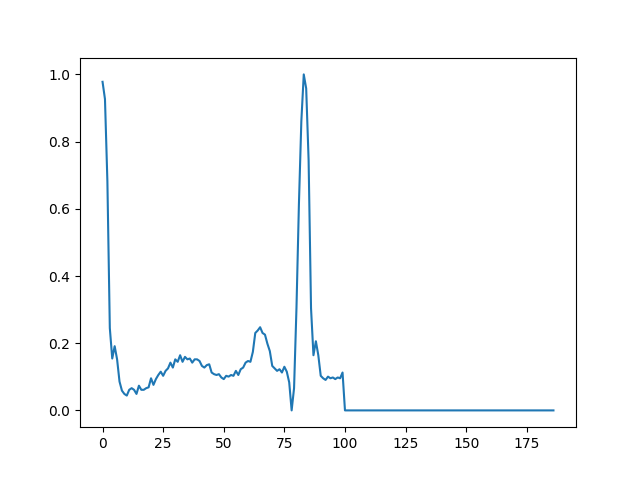

In [7]:
plt.figure()
ecg_example = full_df.iloc[0,:187]
plt.plot(ecg_example);

## Dataset Distribution

In [8]:
full_df[187]=full_df[187].astype(int)
equilibre=full_df[187].value_counts(sort=False)
print(equilibre)

0    90589
1     2779
2     7236
3      803
4     8039
Name: 187, dtype: int64


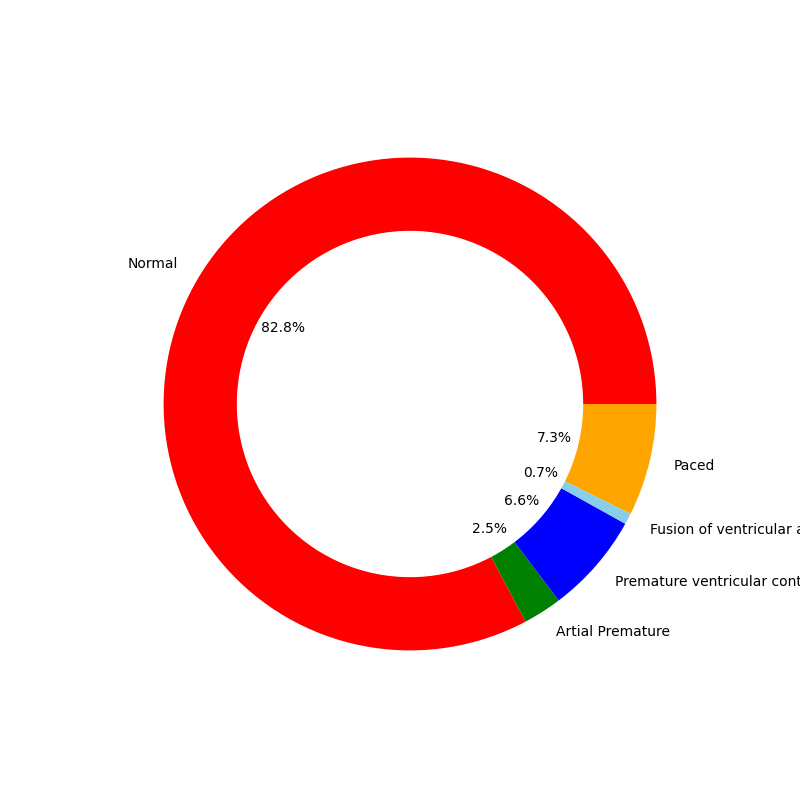

In [9]:
plt.figure(figsize=(8,8))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(equilibre, labels= labels
        , colors=['red','green','blue','skyblue','orange'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [10]:
samples = list()
samples.append(plot_ecg_examples(full_df, 0, 5))
samples.append(plot_ecg_examples(full_df, 1, 5))
samples.append(plot_ecg_examples(full_df, 2, 5))
samples.append(plot_ecg_examples(full_df, 3, 5))
samples.append(plot_ecg_examples(full_df, 4, 5))

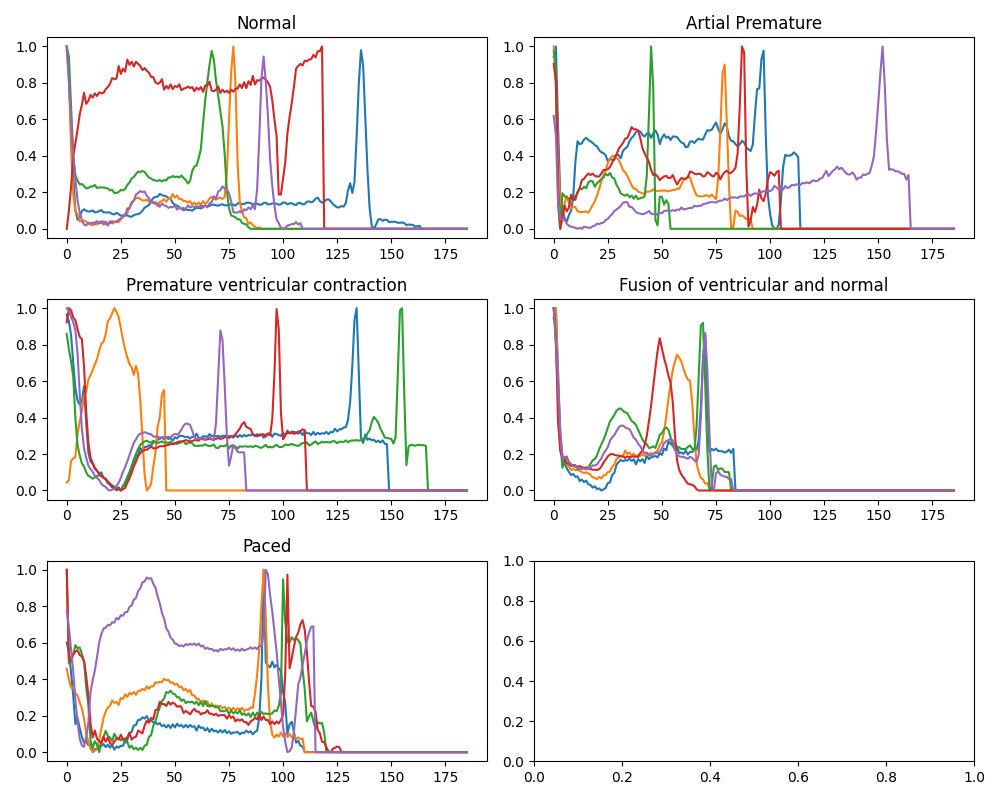

In [11]:
fig, axs = plt.subplots(3, 2, figsize=(10, 8))
titles = labels
for i in range(5):
    ax = axs.flat[i]
    ax.plot(samples[i].values[:,:-2].transpose())
    ax.set_title(titles[i])

fig.tight_layout()
plt.show()

## Visualization of clusters

## LinearPCA

In [ ]:
pca_data_0 = get_random_data_from_class(full_df, 0, n_examples=500)
pca_data_1 = get_random_data_from_class(full_df, 1, n_examples=500)
pca_data_2 = get_random_data_from_class(full_df, 2, n_examples=500)
pca_data_3 = get_random_data_from_class(full_df, 3, n_examples=500)
pca_data_4 = get_random_data_from_class(full_df, 4, n_examples=500)

# put the different dataframes into one dataframe
pca_data = pd.concat([pca_data_0, pca_data_1, pca_data_2, pca_data_3, pca_data_4])

In [ ]:
# Find the first 3 principal components for both the datasets
linear_pca = KernelPCA(kernel="linear", n_components=4, random_state=0)

np_linear_pca = linear_pca.fit_transform(pca_data[pca_data.columns[:-1]])

In [ ]:
save_pca_results_to_csv(linear_pca, full_df, 'PCA_MIT-BIH_Results/linear_pca_results.csv')
dump(linear_pca, 'PCA_MIT-BIH_Results/linear_pca_model.joblib')

In [12]:
# Find the first 3 principal components for both the datasets
linear_pca = KernelPCA(kernel="linear", n_components=4, random_state=0)

np_linear_pca = linear_pca.fit(full_df[full_df.columns[:-1]])

In [ ]:
save_pca_results_to_csv(linear_pca, full_df, 'PCA_MIT-BIH_Results/linear_pca_results.csv')
dump(linear_pca, 'PCA_MIT-BIH_Results/linear_pca_model.joblib')

In [ ]:
plot_3D_pca(np_linear_pca, full_df, 5, labels, 'Linear PCA')

In [ ]:
pairplot_pca(np_linear_pca, full_df, 'Linear PCA')

## Sigmoid PCA

In [ ]:
# Find the first 3 principal components for both the datasets
sigmoid_pca = KernelPCA(kernel="sigmoid", n_components=4, random_state=0)

np_sigmoid_pca = sigmoid_pca.fit_transform(full_df[full_df.columns[:-1]])

In [ ]:
plot_3D_pca(np_sigmoid_pca, full_df, 5, labels, 'Sigmoid Kernel PCA')

In [ ]:
pairplot_pca(np_sigmoid_pca, full_df, 'Sigmoid Kernel PCA')

## RBF PCA

In [ ]:
# Find the first 3 principal components for both the datasets
rbf_pca = KernelPCA(kernel="rbf", n_components=4, random_state=0)

np_rbf_pca = rbf_pca.fit_transform(full_df[full_df.columns[:-1]])

In [ ]:
plot_3D_pca(np_sigmoid_pca, full_df, 5, labels, 'RBF Kernel PCA')

In [ ]:
pairplot_pca(np_sigmoid_pca, full_df, 'RBF Kernel PCA')

## Poly PCA

In [ ]:
# Find the first 3 principal components for both the datasets
poly_pca = KernelPCA(kernel="poly", n_components=4, random_state=0, degree=3)

np_poly_pca = poly_pca.fit_transform(full_df[full_df.columns[:-1]])

In [ ]:
plot_3D_pca(np_poly_pca, full_df, 5, labels, 'Poly Kernel PCA')

In [ ]:
pairplot_pca(np_poly_pca, full_df, 'Poly Kernel PCA')

## TSNE

Testing part for a TSNE with 4 components and 500 instances from each class

In [ ]:
tsne = TSNE(n_components=4, verbose=1, random_state=123, method='exact')

np_tsne = tsne.fit_transform(full_df.values[:,:-1])


In [ ]:
plot_3D_pca(np_tsne, full_df, 5, labels, 't-SNE')

In [ ]:
pairplot_pca(np_tsne, full_df, 't-SNE')